Manglares

In [29]:
import plotly.express as px
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import geodatasets
from shapely.geometry import Point


In [30]:
data = pd.read_csv('E:\\Data\MarinosCosteros\\dwca-invemar_estructura_manglar-v1.0\\occurrence.txt',sep = "\t")
print(data.columns)



Index(['id', 'type', 'institutionID', 'institutionCode', 'basisOfRecord',
       'occurrenceID', 'recordedBy', 'occurrenceStatus',
       'previousIdentifications', 'eventID', 'parentEventID', 'eventDate',
       'eventTime', 'year', 'month', 'day', 'verbatimEventDate', 'continent',
       'country', 'countryCode', 'stateProvince', 'locality',
       'verbatimLocality', 'decimalLatitude', 'decimalLongitude',
       'geodeticDatum', 'identificationVerificationStatus', 'scientificNameID',
       'nameAccordingToID', 'scientificName', 'nameAccordingTo', 'kingdom',
       'phylum', 'class', 'order', 'family', 'genus', 'specificEpithet',
       'taxonRank', 'verbatimTaxonRank', 'scientificNameAuthorship',
       'taxonomicStatus'],
      dtype='object')


<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\User\AppData\Local\Temp\ipykernel_28288\3069463936.py:1: SyntaxWarning: invalid escape sequence '\M'
  data = pd.read_csv('E:\\Data\MarinosCosteros\\dwca-invemar_estructura_manglar-v1.0\\occurrence.txt',sep = "\t")


## Revanando los datos

In [31]:
subData=data[['scientificName','decimalLatitude','decimalLongitude']]
display(subData)

,scientificName,decimalLatitude,decimalLongitude
0,Rhizophora ×harrisonii,3.774806,-77.156972
1,Rhizophora ×harrisonii,3.774806,-77.156972
2,Rhizophora ×harrisonii,3.774806,-77.156972
3,Rhizophora ×harrisonii,3.774806,-77.156972
4,Rhizophora ×harrisonii,3.774806,-77.156972
...,...,...,...
15387,Rhizophora racemosa,5.410028,-76.618333
15388,Rhizophora racemosa,5.410028,-76.618333
15389,Rhizophora racemosa,5.410028,-76.618333
15390,Rhizophora racemosa,5.410028,-76.618333


## Convirtiendo el DataFrame a GeoDataFrame

In [32]:
geometry = [Point(xy) for xy in zip(data['decimalLongitude'], data['decimalLatitude'])]
gdf = GeoDataFrame(data, geometry=geometry)   
display(gdf['geometry'])

0        POINT (-77.15697 3.77481)
1        POINT (-77.15697 3.77481)
2        POINT (-77.15697 3.77481)
3        POINT (-77.15697 3.77481)
4        POINT (-77.15697 3.77481)
                   ...            
15387    POINT (-76.61833 5.41003)
15388    POINT (-76.61833 5.41003)
15389    POINT (-76.61833 5.41003)
15390    POINT (-76.61833 5.41003)
15391    POINT (-76.61833 5.41003)
Name: geometry, Length: 15392, dtype: geometry

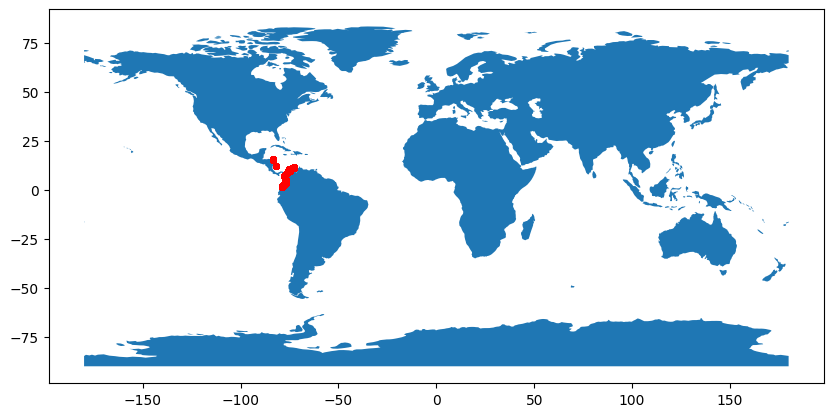

In [27]:
world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [37]:
color_scale = [(0, 'orange'), (1,'red')]
fig = px.scatter_mapbox(data, 
                        lat="decimalLatitude", 
                        lon="decimalLongitude",                      
                        color_continuous_scale=color_scale,                        
                        zoom=8, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

C:\Users\User\AppData\Local\Temp\ipykernel_28288\525415712.py:2: DeprecationWarning: *scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.scatter_mapbox(data,


In [40]:
shapefile= gdf[['geometry','scientificName']] 
shapefile.to_file('file.shp', driver='ESRI Shapefile')

C:\Users\User\AppData\Local\Temp\ipykernel_28288\649991668.py:2: UserWarning:

Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.

